# Fake News Detection System 
---
> <span style="color:crimson;font-size:24px;font-style:italic;font-family:garamond"> Cleaning phase : </span>
---

<div class="alert alert-block alert-info"style="font-size:19px;font-family:Georgia;font-style:italic;">
    Author  : <strong>Es-saouiqui Amine. </strong>
</div>

<div class="alert alert-success" style="font-size:20px; font-family:Garamond; font-style:italic;">
  This notebook covers the cleaning process and ingestion of the <strong>Fake-Politic-Oslo</strong> dataset.<br/>
  The output corpus will be used to train a machine learning model designed to predict the credibility of news articles — whether they are real or fake.
  <blockquote>
    For more details and information about the dataset, I’ve included the link below for further investigation:<br/>
    <a href="https://figshare.com/articles/dataset/PolitiFact_dataset/28614938" target="_blank">PolitiFact-Oslo Dataset</a>
  </blockquote>
</div>

## 1. Loading the dataset :
---

In [47]:
# Load the necessary libraries :
import pandas as pd
import matplotlib.pyplot as plt 
from pathlib import Path
import re
import seaborn as sns

In [48]:
# Define the dataset path 
path = Path("./dataset/politifact_train.csv")
# Check its existens 
print("Is the path correct : ",path.exists())

Is the path correct :  True


In [49]:
# Load the dataset 
df = pd.read_csv(str(path),sep=",")

In [50]:
# Listing the columns 
print("Columns :\n  ")
df.columns

Columns :
  


Index(['Unnamed: 0', 'news', 'label'], dtype='object')

In [51]:
# Listing the first 5 rows
df.iloc[:5]

,Unnamed: 0,news,label
0,0,“Pennsylvania is under a court order to count ...,0
1,1,“Biden and Democrats have dismantled border se...,0
2,2,Katie Hobbs “has voted to double our gas tax. ...,1
3,3,Reuters reported that Nancy Pelosi bought 10 m...,0
4,4,"It's not true that ""the United States was buil...",0


In [52]:
# Display the dataframe shape 
print("Shape  : ",df.shape)

Shape  :  (17090, 3)


In [53]:
# Checking the number of unique values on each column :
df.nunique(axis=0)

Unnamed: 0    17090
news          17090
label             2
dtype: int64

---
- ####  Based on the content of each column in the dataframe and the unique value counts for each feature, we can infer that the Unnamed: 0 column serves merely as an identifier or index. Therefore, it is not useful for further analysis.
- #### The other point is that the news are all unique,thus no duplicates to remove.

---

In [54]:
df = df.drop('Unnamed: 0',axis=1)

In [55]:
df.columns

Index(['news', 'label'], dtype='object')

In [56]:
# Getting infos about the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17090 entries, 0 to 17089
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    17090 non-null  object
 1   label   17090 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 267.2+ KB


In [57]:
# Checking for empty texts 
empty_text_counts = ((df["news"] == '') | (df["news"] == " ")).sum()
print("Number of empty text : ",empty_text_counts)

Number of empty text :  0


In [58]:
# Extract some features 
# calculate the word count of each sample
df['word_count'] = df['news'].apply(lambda x : len(x.split()))

In [59]:
# count the caractere words
df['char_count'] = df['news'].apply(lambda x : len(x))

In [60]:
# Count the number of sentences 
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize

df['sentence_count'] = df['news'].apply(lambda x: len(sent_tokenize(str(x))))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\amine\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [61]:
df

,news,label,word_count,char_count,sentence_count
0,“Pennsylvania is under a court order to count ...,0,741,4570,34
1,“Biden and Democrats have dismantled border se...,0,1108,7914,57
2,Katie Hobbs “has voted to double our gas tax. ...,1,489,2909,26
3,Reuters reported that Nancy Pelosi bought 10 m...,0,295,1818,17
4,"It's not true that ""the United States was buil...",0,1158,7278,58
...,...,...,...,...,...
17085,"""I fought to bring about the largest private-s...",1,753,4694,35
17086,"""When George Bush said we shouldn't investigat...",1,527,3379,22
17087,"Sarah Palin was repeating ""Abraham Lincoln's w...",1,921,5121,45
17088,"""He admits he still doesn't know how to use a ...",1,959,5295,62


In [62]:
# Count the headlines 
def punctuation_features(text):
    return {
        "exclamation_count": text.count("!"),
        "question_count": text.count("?"),
        "ellipsis_count": text.count("..."),
        "dash_count": text.count("-"),
        "parenthesis_count": text.count("(") + text.count(")"),
        "hashtag_count": text.count("#"),
        "mention_count": text.count("@")
    }

In [63]:
# Apply them on the dataframe 
punct_df = df['news'].apply(punctuation_features).apply(pd.Series)

In [64]:
df= pd.concat([df,punct_df],axis=1)

In [65]:
df

,news,label,word_count,char_count,sentence_count,exclamation_count,question_count,ellipsis_count,dash_count,parenthesis_count,hashtag_count,mention_count
0,“Pennsylvania is under a court order to count ...,0,741,4570,34,6,0,0,12,2,0,0
1,“Biden and Democrats have dismantled border se...,0,1108,7914,57,4,1,0,13,36,0,0
2,Katie Hobbs “has voted to double our gas tax. ...,1,489,2909,26,0,0,0,8,2,0,0
3,Reuters reported that Nancy Pelosi bought 10 m...,0,295,1818,17,0,0,0,2,2,1,0
4,"It's not true that ""the United States was buil...",0,1158,7278,58,1,0,0,20,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17085,"""I fought to bring about the largest private-s...",1,753,4694,35,0,1,0,20,6,0,0
17086,"""When George Bush said we shouldn't investigat...",1,527,3379,22,0,0,0,5,0,0,0
17087,"Sarah Palin was repeating ""Abraham Lincoln's w...",1,921,5121,45,0,2,1,5,0,0,0
17088,"""He admits he still doesn't know how to use a ...",1,959,5295,62,0,2,0,15,0,0,0


# 2. Exploring the dataset :
----

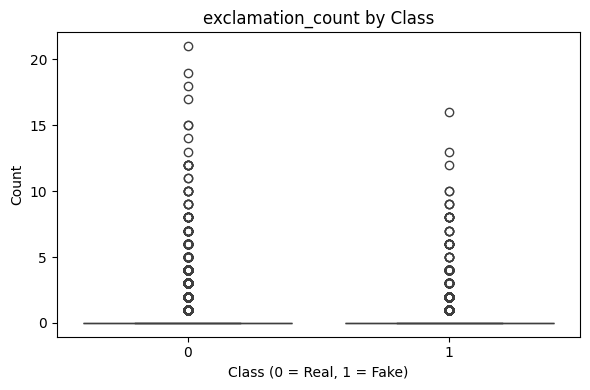

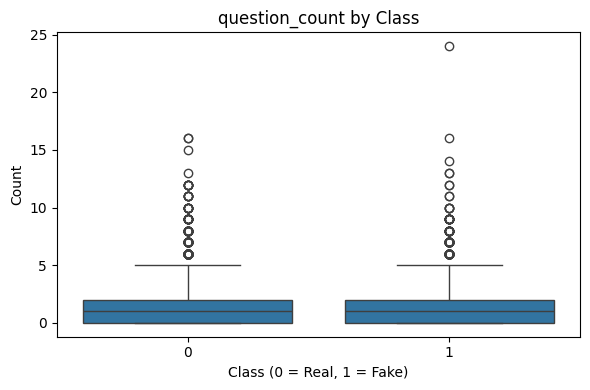

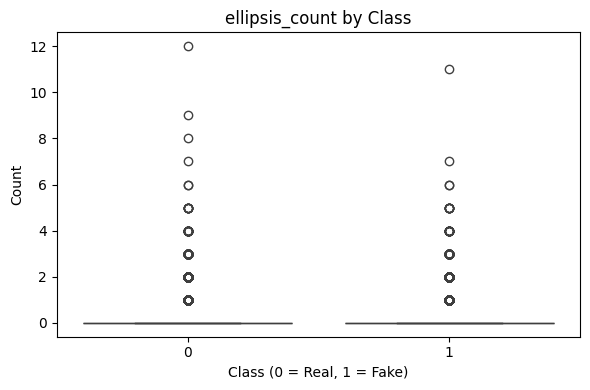

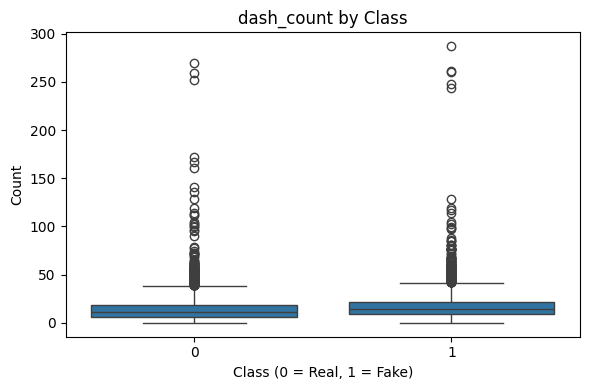

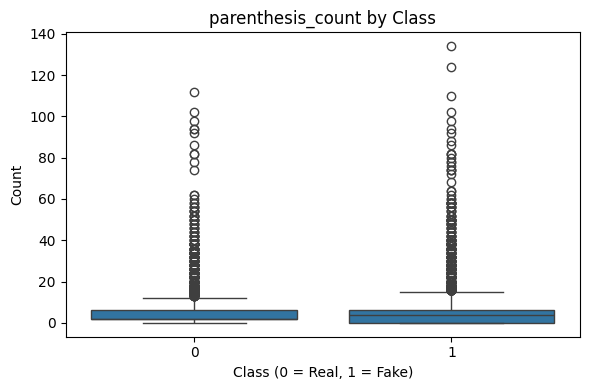

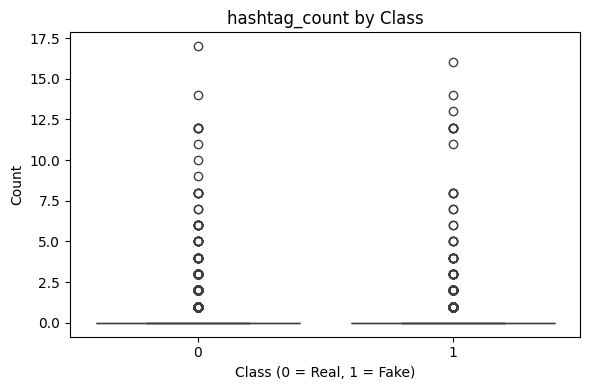

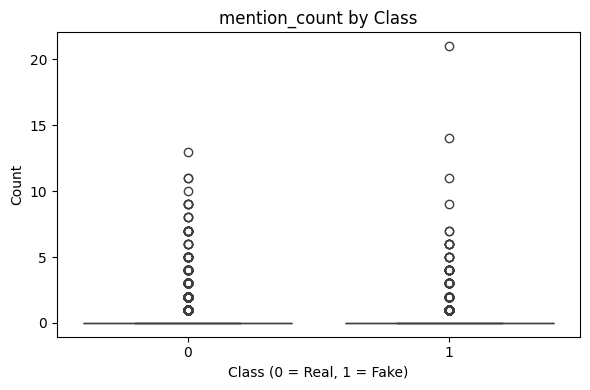

In [66]:
# Visualise the ditribution over classes based on each features 
features = ['exclamation_count', 'question_count', 'ellipsis_count',  'dash_count', 'parenthesis_count', 'hashtag_count', 'mention_count']
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f"{feature} by Class")
    plt.xlabel("Class (0 = Real, 1 = Fake)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


> ### Based on those visualisations : most of the healines are null,besides they share the same amount for both classes which doesn't give any distiguishing information between real and fake news.

In [67]:
df = df.drop(features,axis=1)

In [68]:
df

,news,label,word_count,char_count,sentence_count
0,“Pennsylvania is under a court order to count ...,0,741,4570,34
1,“Biden and Democrats have dismantled border se...,0,1108,7914,57
2,Katie Hobbs “has voted to double our gas tax. ...,1,489,2909,26
3,Reuters reported that Nancy Pelosi bought 10 m...,0,295,1818,17
4,"It's not true that ""the United States was buil...",0,1158,7278,58
...,...,...,...,...,...
17085,"""I fought to bring about the largest private-s...",1,753,4694,35
17086,"""When George Bush said we shouldn't investigat...",1,527,3379,22
17087,"Sarah Palin was repeating ""Abraham Lincoln's w...",1,921,5121,45
17088,"""He admits he still doesn't know how to use a ...",1,959,5295,62


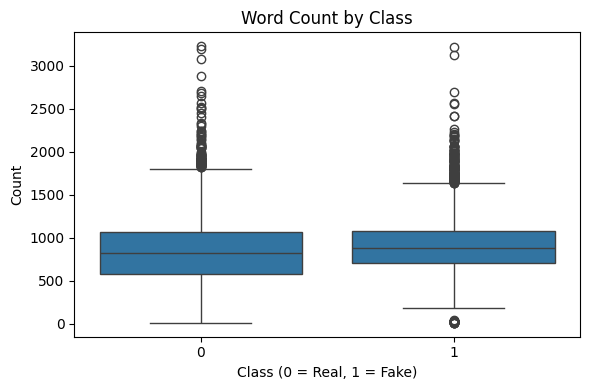

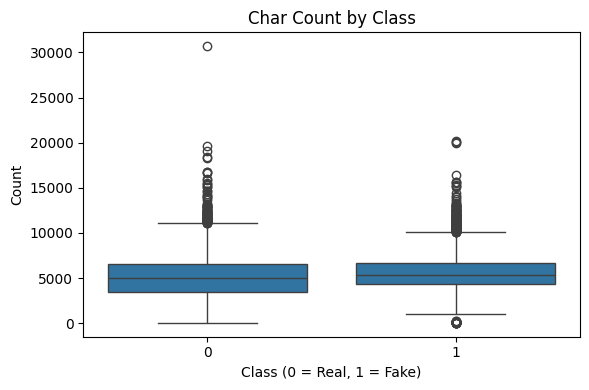

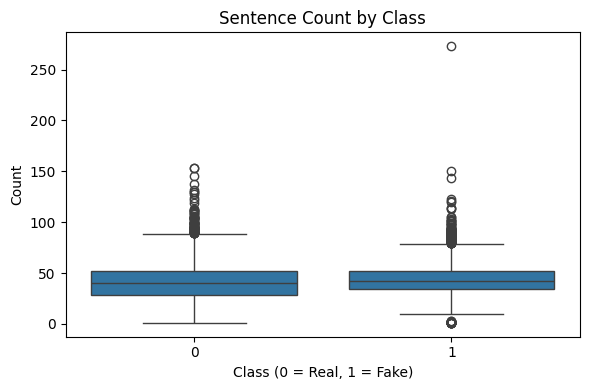

In [69]:
# Visualising classes based on length features 
length_features = ['word_count', 'char_count', 'sentence_count']

for feature in length_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='label', y=feature, data=df)
    plt.title(f"{feature.replace('_', ' ').title()} by Class")
    plt.xlabel("Class (0 = Real, 1 = Fake)")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

In [70]:
df['label'].value_counts()

label
0    9746
1    7344
Name: count, dtype: int64

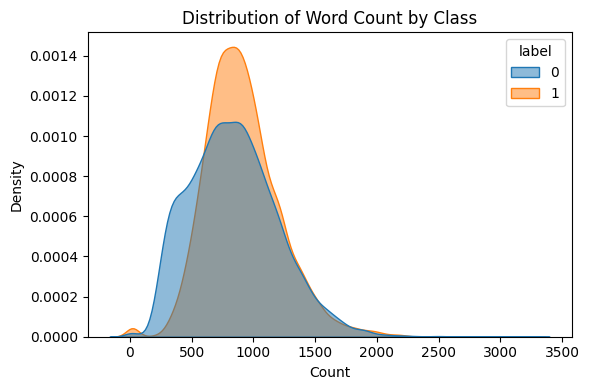

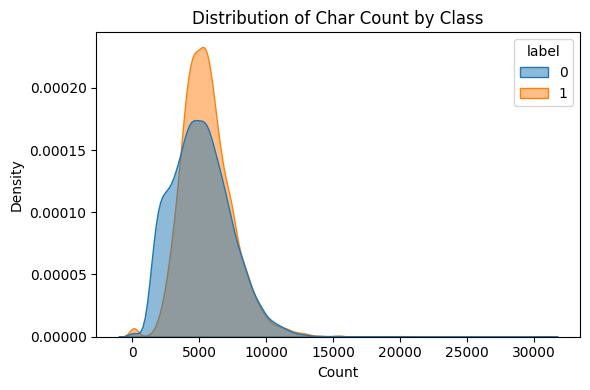

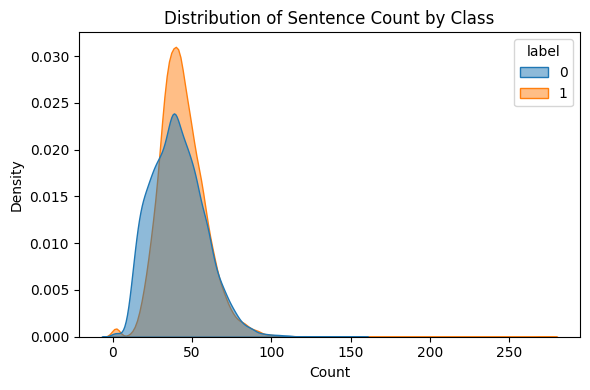

In [71]:
for feature in length_features:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df, x=feature, hue='label', fill=True, common_norm=False, alpha=0.5)
    plt.title(f"Distribution of {feature.replace('_', ' ').title()} by Class")
    plt.xlabel("Count")
    plt.ylabel("Density")
    plt.tight_layout()
    plt.show()

> ### Based on the visulisation,eventhough that the fake news concentrate on the mean but they are spread as well as real news which mean they have the same variance,hence there is nothing to extract from these features.

In [78]:
df = df.drop(length_features,axis=1)

# 3. Cleaning Phase phase :
---

<div class="alert alert-block alert-danger" style="font-size:16px;">
    In case  the dataset column's name has been changed from the provider,as this notebook could be used as a pipeline,<br>
    the functions defined here assume that the two main columns are respectivly named : news,labels <br>
    That is why we will define a decorator to validate the naming convention of the dataframe.
</div>

In [81]:
df['tokens'] = None

In [82]:
# Define the column_validator 
from typing import Callable 
def column_validator(function)->Callable:
    def wrapper(df:pd.DataFrame):
        if not all(df.columns == ['news','label','tokens']):
            raise ValueError("Column names mismatch,the columns should repectively be : ['news','label','tokens']")
        return function(df)
    return wrapper

## a. Lowering : 
---

In [83]:
# Converting all texts to lower case 
@column_validator
def lowering(df:pd.DataFrame)->pd.DataFrame:
    df["news"] = df["news"].str.lower()
    return df

In [84]:
# Lowering the training set 
lowering(df)

,news,label,tokens
0,“pennsylvania is under a court order to count ...,0,None
1,“biden and democrats have dismantled border se...,0,None
2,katie hobbs “has voted to double our gas tax. ...,1,None
3,reuters reported that nancy pelosi bought 10 m...,0,None
4,"it's not true that ""the united states was buil...",0,None
...,...,...,...
17085,"""i fought to bring about the largest private-s...",1,None
17086,"""when george bush said we shouldn't investigat...",1,None
17087,"sarah palin was repeating ""abraham lincoln's w...",1,None
17088,"""he admits he still doesn't know how to use a ...",1,None


## b . remove special caracteres and tags :
---

In [85]:
# remove non words caracters
def clean_text(text):
    # 2. links
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # emails
    text = re.sub(r"\S+@\S+", '', text)
    # @
    text = re.sub(r"@\w+", '', text)
    # html 
    text = re.sub(r'<[^>]+>', '', text)
    # whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    # Punctuation 
    text = re.sub(r'[.,!?;:]', '', text)
    # digits 
    text = re.sub(r'\d+', '', text)
    return text

In [86]:
import contractions
@column_validator
def remove_non_words_caracters(df):
    df['news'] = df['news'].apply(clean_text)
    return df 

In [87]:
df = remove_non_words_caracters(df)

In [88]:
df

,news,label,tokens
0,“pennsylvania is under a court order to count ...,0,None
1,“biden and democrats have dismantled border se...,0,None
2,katie hobbs “has voted to double our gas tax i...,1,None
3,reuters reported that nancy pelosi bought mil...,0,None
4,"it's not true that ""the united states was buil...",0,None
...,...,...,...
17085,"""i fought to bring about the largest private-s...",1,None
17086,"""when george bush said we shouldn't investigat...",1,None
17087,"sarah palin was repeating ""abraham lincoln's w...",1,None
17088,"""he admits he still doesn't know how to use a ...",1,None


## c. Expanding contractors : 
---

In [89]:
# expand contractions 
import contractions as ctr
@column_validator
def expand_contractors(df):
    df['news'] = df['news'].apply(lambda x : ctr.fix(x))
    return df

In [90]:
df = expand_contractors(df)

In [91]:
df

,news,label,tokens
0,“pennsylvania is under a court order to count ...,0,None
1,“biden and democrats have dismantled border se...,0,None
2,katie hobbs “has voted to double our gas tax i...,1,None
3,reuters reported that nancy pelosi bought mil...,0,None
4,"it is not true that ""the united states was bui...",0,None
...,...,...,...
17085,"""i fought to bring about the largest private-s...",1,None
17086,"""when george bush said we should not investiga...",1,None
17087,"sarah palin was repeating ""abraham lincoln's w...",1,None
17088,"""he admits he still does not know how to use a...",1,None


In [92]:
# Remove quotes 
@column_validator
def remove_quotes(df):
    df['news'] = df['news'].apply(lambda x: re.sub(r"[\"\'\u2018\u2019\u201C\u201D]", '', x))
    return df 

In [93]:
df = remove_quotes(df)

In [94]:
df

,news,label,tokens
0,pennsylvania is under a court order to count t...,0,None
1,biden and democrats have dismantled border sec...,0,None
2,katie hobbs has voted to double our gas tax in...,1,None
3,reuters reported that nancy pelosi bought mil...,0,None
4,it is not true that the united states was buil...,0,None
...,...,...,...
17085,i fought to bring about the largest private-se...,1,None
17086,when george bush said we should not investigat...,1,None
17087,sarah palin was repeating abraham lincolns wor...,1,None
17088,he admits he still does not know how to use a ...,1,None


## d. Tokenization : 
---

In [118]:
from nltk.tokenize import word_tokenize
@column_validator
def tokenize(df):
    df['tokens'] = df['news'].apply(lambda x: word_tokenize(x))
    return df

In [119]:
df = tokenize(df)

In [120]:
df

,news,label,tokens
0,pennsylvania is under a court order to count t...,0,"[pennsylvania, is, under, a, court, order, to,..."
1,biden and democrats have dismantled border sec...,0,"[biden, and, democrats, have, dismantled, bord..."
2,katie hobbs has voted to double our gas tax in...,1,"[katie, hobbs, has, voted, to, double, our, ga..."
3,reuters reported that nancy pelosi bought mil...,0,"[reuters, reported, that, nancy, pelosi, bough..."
4,it is not true that the united states was buil...,0,"[it, is, not, true, that, the, united, states,..."
...,...,...,...
17085,i fought to bring about the largest private-se...,1,"[i, fought, to, bring, about, the, largest, pr..."
17086,when george bush said we should not investigat...,1,"[when, george, bush, said, we, should, not, in..."
17087,sarah palin was repeating abraham lincolns wor...,1,"[sarah, palin, was, repeating, abraham, lincol..."
17088,he admits he still does not know how to use a ...,1,"[he, admits, he, still, does, not, know, how, ..."


## e. Remove stopwords :
---

In [121]:
# remove the stop words 
from nltk.corpus import stopwords
# download it first 
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [122]:
# download the english stopwords
stop_words = set(stopwords.words('english'))

In [123]:
@column_validator
def remove_stopwords(df):
    df['tokens'] = df['tokens'].apply(lambda tokens: [
        word for word in tokens if word.lower() not in stop_words
    ])
    return df

In [124]:
df = remove_stopwords(df)

In [125]:
df

,news,label,tokens
0,pennsylvania is under a court order to count t...,0,"[pennsylvania, court, order, count, ballots, e..."
1,biden and democrats have dismantled border sec...,0,"[biden, democrats, dismantled, border, securit..."
2,katie hobbs has voted to double our gas tax in...,1,"[katie, hobbs, voted, double, gas, tax, run-up..."
3,reuters reported that nancy pelosi bought mil...,0,"[reuters, reported, nancy, pelosi, bought, mil..."
4,it is not true that the united states was buil...,0,"[true, united, states, built, stolen, land, fl..."
...,...,...,...
17085,i fought to bring about the largest private-se...,1,"[fought, bring, largest, private-sector, infra..."
17086,when george bush said we should not investigat...,1,"[george, bush, said, investigate, governments,..."
17087,sarah palin was repeating abraham lincolns wor...,1,"[sarah, palin, repeating, abraham, lincolns, w..."
17088,he admits he still does not know how to use a ...,1,"[admits, still, know, use, computer, send, e-m..."


## f. Stemming & lemmitisation :
---

In [126]:
# Apply the Stemming 
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4') 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\amine\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\amine\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [127]:
lemmatizer = WordNetLemmatizer()

In [128]:
@column_validator
def apply_lemmatization(df):
    df['tokens'] = df['tokens'].apply(lambda tokens: [
        lemmatizer.lemmatize(word) for word in tokens
    ])
    return df

In [129]:
df = apply_lemmatization(df)

In [130]:
df

,news,label,tokens
0,pennsylvania is under a court order to count t...,0,"[pennsylvania, court, order, count, ballot, el..."
1,biden and democrats have dismantled border sec...,0,"[biden, democrat, dismantled, border, security..."
2,katie hobbs has voted to double our gas tax in...,1,"[katie, hobbs, voted, double, gas, tax, run-up..."
3,reuters reported that nancy pelosi bought mil...,0,"[reuters, reported, nancy, pelosi, bought, mil..."
4,it is not true that the united states was buil...,0,"[true, united, state, built, stolen, land, flo..."
...,...,...,...
17085,i fought to bring about the largest private-se...,1,"[fought, bring, largest, private-sector, infra..."
17086,when george bush said we should not investigat...,1,"[george, bush, said, investigate, government, ..."
17087,sarah palin was repeating abraham lincolns wor...,1,"[sarah, palin, repeating, abraham, lincoln, wo..."
17088,he admits he still does not know how to use a ...,1,"[admits, still, know, use, computer, send, e-m..."


In [131]:
# Join the news tokens
@column_validator
def join_tokens(df):
    df['joined_tokens'] = df['tokens'].apply(lambda x : ' '.join(x))
    return df


In [132]:
df = join_tokens(df)

In [133]:
df

,news,label,tokens,joined_tokens
0,pennsylvania is under a court order to count t...,0,"[pennsylvania, court, order, count, ballot, el...",pennsylvania court order count ballot election...
1,biden and democrats have dismantled border sec...,0,"[biden, democrat, dismantled, border, security...",biden democrat dismantled border security neva...
2,katie hobbs has voted to double our gas tax in...,1,"[katie, hobbs, voted, double, gas, tax, run-up...",katie hobbs voted double gas tax run-up midter...
3,reuters reported that nancy pelosi bought mil...,0,"[reuters, reported, nancy, pelosi, bought, mil...",reuters reported nancy pelosi bought million s...
4,it is not true that the united states was buil...,0,"[true, united, state, built, stolen, land, flo...",true united state built stolen land florida go...
...,...,...,...,...
17085,i fought to bring about the largest private-se...,1,"[fought, bring, largest, private-sector, infra...",fought bring largest private-sector infrastruc...
17086,when george bush said we should not investigat...,1,"[george, bush, said, investigate, government, ...",george bush said investigate government respon...
17087,sarah palin was repeating abraham lincolns wor...,1,"[sarah, palin, repeating, abraham, lincoln, wo...",sarah palin repeating abraham lincoln word dis...
17088,he admits he still does not know how to use a ...,1,"[admits, still, know, use, computer, send, e-m...",admits still know use computer send e-mail lat...


In [134]:
# Save the data 
target_path = Path('./dataset/clean_politifact_train_dataset.csv')

df.to_csv(str(target_path),index=False,header=True)

---
# Done 
---